#### 257. Binary Tree Paths
https://leetcode.com/problems/binary-tree-paths/description/

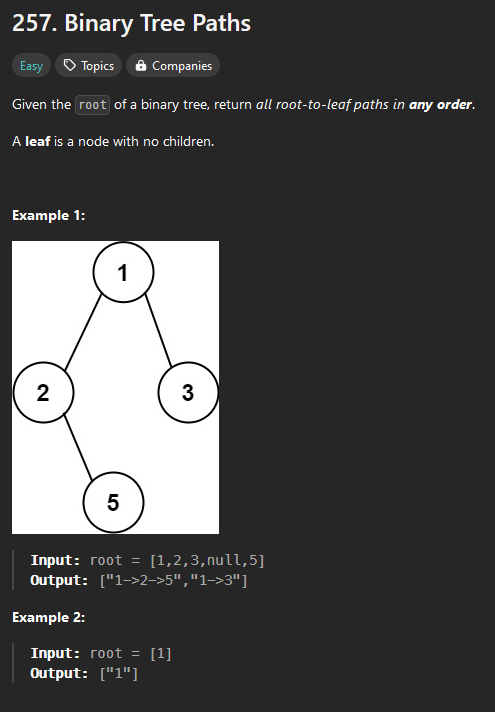

In [1]:
""" Important question: how should the paths be returned? """
# Since root node appears first use preorder


class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def list_to_bin_tree(l):
    if not l:
        return None

    root = Node(l.pop(0))
    queue = [root]

    while queue:
        node = queue.pop(0)

        if l:
            left_val = l.pop(0)
            if left_val != None:
                node.left = Node(left_val)
                queue.append(node.left)

        if l:
            right_val = l.pop(0)
            if right_val != None:
                node.right = Node(right_val)
                queue.append(node.right)

    return root

""" NOTE: this function has side effects where it does not return anything only modifies an array using recurision
    not generally a recommended practice but okay in algo problems
"""
def explore_nodes(node, all_paths, path_so_far):
    # estbalish edge case: if empty node return
    if not node: return
    
    # process a single node, take the val and cast into string
    # however each path needs it's own recursively built string so declare a new var for each path
    new_path = path_so_far + str(node.val)
    
    # if node has children, traverse to leaf node recursively
    if node.left or node.right:
        
        # add arrow to indicate path to child node
        new_path += '->'
        
        # traverse child nodes recursively with output array, and a new path for each path from root to leaf
        explore_nodes(node.left, all_paths, new_path)
        explore_nodes(node.right, all_paths, new_path)
    
    # if there are no children
    else:
        # add proccesed node val to output array
        all_paths.append(new_path)
    
    
    

def binaryTreePath(root):
    # input: root node, output: array of strings from root to leaf nodes
    # need to go from root to leaf, root comes first in preorder DFS
    # use pre order DFS to traverse the tree from root to leaf
    
    # establish edge case: emppty tree return empty array
    if not root: return []
    
    # create output array
    all_paths = []
    
    # do something here, call helper function with initial empty array, and empty path string
    explore_nodes(root, all_paths, '')
        
    
    # output array needs to be returned
    return all_paths


     

def test_solution():
    
    tests = [
        {"input": [], "output": []},
        {"input": [1], "output": ["1"]},
        {"input": [1,2], "output": ["1->2"]},
        {"input": [1,None,3], "output": ["1->3"]},
        {"input": [1,2,3], "output": ["1->2","1->3"]},
        {"input": [1,2,3,4,5], "output": ["1->2->4","1->2->5","1->3"]},
        {"input": [1,2,3,None,None,6,7], "output": ["1->2","1->3->6","1->3->7"]}
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            binaryTreePath(list_to_bin_tree(tests[i]["input"]))
            == tests[i]["output"] 
        )

In [2]:
test_solution()

Test 1 Pass: True
Test 2 Pass: True
Test 3 Pass: True
Test 4 Pass: True
Test 5 Pass: True
Test 6 Pass: True
Test 7 Pass: True


### Complexity
1. Time: traverse all nodes -> O(n)
2. Space: number of paths is dependent on number of nodes -> O(n)
    However note that the real answer is (N+1)/2 which is the same as N

In [8]:
""" NOTE: solution without side effect"""
def binaryTreePath_mod(root):
    # Base case: If the tree is empty, return an empty list
    if not root:
        print("Reached an empty node, returning an empty list.")
        return []
    
    # Base case: If the node is a leaf, return the single path as a list
    if not root.left and not root.right:
        print(f"Reached leaf node {root.val}, returning [{root.val}]")
        return [str(root.val)]
    
    # Recursive case: Collect all paths from the left and right subtrees
    print(f"At node {root.val}, exploring left and right subtrees.")
    paths = []
    
    # Collect paths from the left subtree
    left_paths = binaryTreePath_mod(root.left)
    print(f"Left paths from node {root.val}: {left_paths}")
    
    for path in left_paths:
        new_path = str(root.val) + "->" + path
        print(f"Appending path from left child: {new_path}")
        paths.append(new_path)
    
    # Collect paths from the right subtree
    right_paths = binaryTreePath_mod(root.right)
    print(f"Right paths from node {root.val}: {right_paths}")
    
    for path in right_paths:
        new_path = str(root.val) + "->" + path
        print(f"Appending path from right child: {new_path}")
        paths.append(new_path)
    
    print(f"Returning all paths from node {root.val}: {paths}")
    return paths

def test_solution_mod():
    
    tests = [
        # {"input": [], "output": []},
        # {"input": [1], "output": ["1"]},
        # {"input": [1,2], "output": ["1->2"]},
        {"input": [1,2,3,None,5,None,None], "output": ["1->2->5","1->3"]},
        # {"input": [1,2,3], "output": ["1->2","1->3"]},
        # {"input": [1,2,3,4,5], "output": ["1->2->4","1->2->5","1->3"]},
        # {"input": [1,2,3,None,None,6,7], "output": ["1->2","1->3->6","1->3->7"]}
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            binaryTreePath_mod(list_to_bin_tree(tests[i]["input"]))
            == tests[i]["output"] 
        )

In [9]:
test_solution_mod()

At node 1, exploring left and right subtrees.
At node 2, exploring left and right subtrees.
Reached an empty node, returning an empty list.
Left paths from node 2: []
Reached leaf node 5, returning [5]
Right paths from node 2: ['5']
Appending path from right child: 2->5
Returning all paths from node 2: ['2->5']
Left paths from node 1: ['2->5']
Appending path from left child: 1->2->5
Reached leaf node 3, returning [3]
Right paths from node 1: ['3']
Appending path from right child: 1->3
Returning all paths from node 1: ['1->2->5', '1->3']
Test 1 Pass: True
